In [ ]:
#Imorting all libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC  
from sklearn.model_selection import train_test_split  
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
import statistics

In [ ]:
#read and shuffle data
df = pd.read_csv("/content/Dataset-2 (1).csv")
df = df.sample(frac = 1)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Patient_ID', 'Hematocrit', 'Hemoglobin', 'Platelets',
       'Mean_platelet_volume_', 'Red_blood_Cells', 'Lymphocytes',
       'Mean_corpuscular_hemoglobin_concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean_corpuscular_hemoglobin_(MCH)', 'Eosinophils',
       'Mean_corpuscular_volume_(MCV)', 'Monocytes',
       'Red_blood_cell_distribution_width_(RDW)', 'Neutrophils',
       'SARS-Cov-2_exam_result'],
      dtype='object')

In [ ]:
df

,Unnamed: 0,Patient_ID,Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume_,Red_blood_Cells,Lymphocytes,Mean_corpuscular_hemoglobin_concentration (MCHC),Leukocytes,Basophils,Mean_corpuscular_hemoglobin_(MCH),Eosinophils,Mean_corpuscular_volume_(MCV),Monocytes,Red_blood_cell_distribution_width_(RDW),Neutrophils,SARS-Cov-2_exam_result
70,70,60e121cc0a97d81,0.694287,0.416252,0.060430,0.796029,0.225417,1.401554,-0.851210,-0.656734,0.998070,0.282719,0.892207,0.747050,0.147441,-0.094334,-1.528714,0
474,474,1e29f841c72888e,-1.617460,-1.463427,0.550341,-0.438097,-1.625771,-0.568655,0.244149,-0.773612,-0.529226,0.491805,0.934346,0.426576,-0.220244,-0.359703,0.528192,1
168,168,2a5db9bbb45109f,-0.518807,-0.272964,-0.215930,0.459449,-0.515058,-0.457777,0.941197,-0.573250,-0.223767,0.439533,-0.709090,0.066045,2.537393,-0.801985,-0.127395,1
567,567,4279fcab11b71ae,1.152058,1.230779,1.002566,-0.550290,1.371390,0.036907,0.542882,0.679006,0.081693,-0.344541,2.072109,-0.675050,0.278757,0.082579,-0.446994,0
31,31,733a6850e89b1df,0.694287,0.729532,-0.341548,-1.111256,0.401720,0.693644,0.343725,-0.428545,-1.140144,0.491805,0.007280,0.386517,-1.796036,0.171035,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,270,88307879155ffa9,0.785841,0.416252,-1.158065,2.927700,-0.127191,-1.617727,-1.149948,0.673440,0.081693,0.962249,-0.751229,1.688438,-1.113193,2.470904,2.052433,0
150,150,944368db7c82019,0.488289,0.353596,-0.391795,1.132609,0.683806,0.497476,-0.353319,-0.411849,-0.223767,-0.658171,-0.624811,-0.534842,-0.640455,-1.155812,-0.070032,0
107,107,4f7ad03d81abafc,-0.862136,-0.774212,-2.276066,0.347255,-1.061599,0.096611,0.144572,-1.828290,1.914447,0.648619,-0.835508,0.646902,1.092916,1.232513,NaN,0
455,455,b388e20effbbf0b,0.762952,0.541564,-1.748470,-0.213711,0.278308,0.864224,-0.652057,-0.261578,-1.140144,0.387261,0.007280,0.747050,-1.008140,0.259492,NaN,1


In [ ]:
df['SARS-Cov-2_exam_result'].value_counts()

0    519
1     83
Name: SARS-Cov-2_exam_result, dtype: int64

In [ ]:
df.shape

(602, 18)

In [ ]:
#dropping id column as it is not a valid attribute to train model
df = df.drop(['Unnamed: 0'], axis = 1)
df = df.drop(['Patient_ID'], axis = 1)

In [ ]:
df

,Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume_,Red_blood_Cells,Lymphocytes,Mean_corpuscular_hemoglobin_concentration (MCHC),Leukocytes,Basophils,Mean_corpuscular_hemoglobin_(MCH),Eosinophils,Mean_corpuscular_volume_(MCV),Monocytes,Red_blood_cell_distribution_width_(RDW),Neutrophils,SARS-Cov-2_exam_result
70,0.694287,0.416252,0.060430,0.796029,0.225417,1.401554,-0.851210,-0.656734,0.998070,0.282719,0.892207,0.747050,0.147441,-0.094334,-1.528714,0
474,-1.617460,-1.463427,0.550341,-0.438097,-1.625771,-0.568655,0.244149,-0.773612,-0.529226,0.491805,0.934346,0.426576,-0.220244,-0.359703,0.528192,1
168,-0.518807,-0.272964,-0.215930,0.459449,-0.515058,-0.457777,0.941197,-0.573250,-0.223767,0.439533,-0.709090,0.066045,2.537393,-0.801985,-0.127395,1
567,1.152058,1.230779,1.002566,-0.550290,1.371390,0.036907,0.542882,0.679006,0.081693,-0.344541,2.072109,-0.675050,0.278757,0.082579,-0.446994,0
31,0.694287,0.729532,-0.341548,-1.111256,0.401720,0.693644,0.343725,-0.428545,-1.140144,0.491805,0.007280,0.386517,-1.796036,0.171035,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,0.785841,0.416252,-1.158065,2.927700,-0.127191,-1.617727,-1.149948,0.673440,0.081693,0.962249,-0.751229,1.688438,-1.113193,2.470904,2.052433,0
150,0.488289,0.353596,-0.391795,1.132609,0.683806,0.497476,-0.353319,-0.411849,-0.223767,-0.658171,-0.624811,-0.534842,-0.640455,-1.155812,-0.070032,0
107,-0.862136,-0.774212,-2.276066,0.347255,-1.061599,0.096611,0.144572,-1.828290,1.914447,0.648619,-0.835508,0.646902,1.092916,1.232513,NaN,0
455,0.762952,0.541564,-1.748470,-0.213711,0.278308,0.864224,-0.652057,-0.261578,-1.140144,0.387261,0.007280,0.747050,-1.008140,0.259492,NaN,1


In [ ]:
df.isnull().any()

Hematocrit                                          False
Hemoglobin                                          False
Platelets                                           False
Mean_platelet_volume_                                True
Red_blood_Cells                                     False
Lymphocytes                                         False
Mean_corpuscular_hemoglobin_concentration (MCHC)    False
Leukocytes                                          False
Basophils                                           False
Mean_corpuscular_hemoglobin_(MCH)                   False
Eosinophils                                         False
Mean_corpuscular_volume_(MCV)                       False
Monocytes                                            True
Red_blood_cell_distribution_width_(RDW)             False
Neutrophils                                          True
SARS-Cov-2_exam_result                              False
dtype: bool

In [ ]:
#df = df.fillna(lambda x: x.median())

In [ ]:
data = df.to_numpy()

data.shape

(602, 16)

In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(data)
#X_2 = X
SimpleImputer()
data = imp.transform(data)

data

array([[ 0.69428688,  0.41625211,  0.06043023, ..., -0.09433432,
        -1.52871394,  0.        ],
       [-1.61745954, -1.46342742,  0.55034077, ..., -0.35970309,
         0.52819222,  1.        ],
       [-0.51880735, -0.27296397, -0.21592958, ..., -0.80198544,
        -0.12739536,  1.        ],
       ...,
       [-0.86213595, -0.774212  , -2.2760663 , ...,  1.23251295,
        -0.05364196,  0.        ],
       [ 0.76295245,  0.54156393, -1.74847019, ...,  0.2594921 ,
        -0.05364196,  1.        ],
       [-0.3356989 , -0.46093205,  1.12818408, ...,  0.43640488,
        -0.57811183,  0.        ]])

In [ ]:
#splitting into 7 folds
data_g = np.array_split(data, 7)

## **LOGISTIC REGRESSION**

0.8848484848484849
----------------------TESTING-----------------------
                precision    recall  f1-score   support

Covid Negative       0.91      0.97      0.94        75
Covid Positive       0.67      0.36      0.47        11

      accuracy                           0.90        86
     macro avg       0.79      0.67      0.71        86
  weighted avg       0.88      0.90      0.88        86

------------------TRAINING-----------------
                precision    recall  f1-score   support

Covid Negative       0.89      0.97      0.93       444
Covid Positive       0.61      0.26      0.37        72

      accuracy                           0.87       516
     macro avg       0.75      0.62      0.65       516
  weighted avg       0.85      0.87      0.85       516



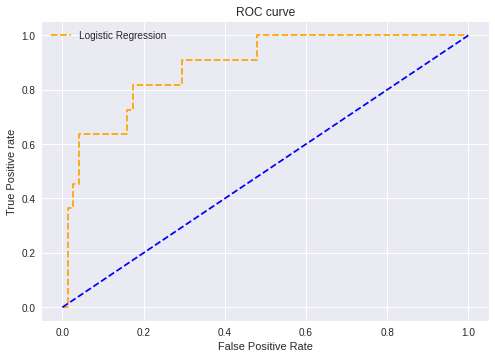

In [ ]:
accuracy_log_test = []
accuracy_log_train = []
classif_log_test=[]
classif_log_train=[]

for i in range(7):
  if i == 6:
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:15])
                train_data_y.append(data_g[j][w][15])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:15])
                test_data_y.append(data_g[j][w][15])
                
    #convert into array
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn 
    clf = LogisticRegression(random_state = 0)
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    test_pred_y_log = clf.predict(test_data_xn)
    train_pred_y_log = clf.predict(train_data_xn)
    
    pred_prob1 = clf.predict_proba(test_data_xn)

    from sklearn.metrics import roc_curve

    # roc curve for models
    fpr1, tpr1, thresh1 = roc_curve(test_data_yn, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(test_data_yn))]
    p_fpr, p_tpr, _ = roc_curve(test_data_yn, random_probs, pos_label=1)
    
    from sklearn.metrics import roc_auc_score
    auc_score1 = roc_auc_score(test_data_yn, pred_prob1[:,1])
    print(auc_score1)

    # matplotlib
    import matplotlib.pyplot as plt
    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    #calculating and appending accuracies
    acc1_log = accuracy_score(test_data_yn, test_pred_y_log)
    accuracy_log_test.append(acc1_log)
    print("----------------------TESTING-----------------------")
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(test_data_yn, test_pred_y_log, target_names=target_names))
    print("------------------TRAINING-----------------")
    acc2_log = accuracy_score(train_data_yn, train_pred_y_log)
    accuracy_log_train.append(acc2_log)
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(train_data_yn, train_pred_y_log, target_names=target_names))


In [ ]:
#Creating the Confusion matrix
cm= confusion_matrix(test_data_yn, test_pred_y_log)
cm

array([[73,  2],
       [ 7,  4]])

In [ ]:
#printing accuracies 

print("Mean accuracy for test set = ", statistics.mean(accuracy_log_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_log_train))


Mean accuracy for test set =  0.8953488372093024
Mean accuracy for train set =  0.874031007751938


# **NAIVE BAYES**

0.8169696969696969
----------------------TESTING-----------------------
                precision    recall  f1-score   support

Covid Negative       0.93      0.92      0.93        75
Covid Positive       0.50      0.55      0.52        11

      accuracy                           0.87        86
     macro avg       0.72      0.73      0.72        86
  weighted avg       0.88      0.87      0.87        86



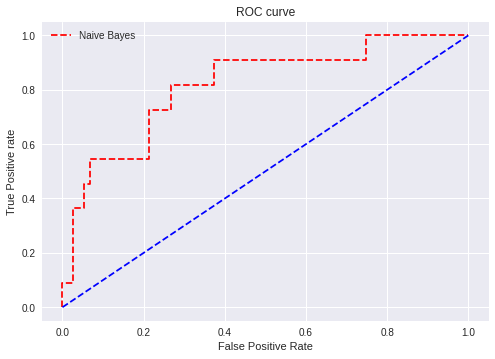

In [ ]:
accuracy_nb_test = []
accuracy_nb_train = []

for i in range(7):
  if i == 6:
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:15])
                train_data_y.append(data_g[j][w][15])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:15])
                test_data_y.append(data_g[j][w][15])
       
    #convert into array         
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn
    clf = GaussianNB()
    clf.fit(train_data_xn, train_data_yn)

    
    #predict class
    test_pred_y_log = clf.predict(test_data_xn)
    train_pred_y_log = clf.predict(train_data_xn)
    
    pred_prob1 = clf.predict_proba(test_data_xn)

    from sklearn.metrics import roc_curve

    # roc curve for models
    fpr2, tpr2, thresh2 = roc_curve(test_data_yn, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(test_data_yn))]
    p_fpr, p_tpr, _ = roc_curve(test_data_yn, random_probs, pos_label=1)
    
    from sklearn.metrics import roc_auc_score
    auc_score1 = roc_auc_score(test_data_yn, pred_prob1[:,1])
    print(auc_score1)

    # matplotlib
    import matplotlib.pyplot as plt
    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    #predict class
    test_pred_y_nb = clf.predict(test_data_xn)
    train_pred_y_nb = clf.predict(train_data_xn)

    #calculating and appending accuracies
    acc1_nb = accuracy_score(test_data_yn, test_pred_y_nb)
    accuracy_nb_test.append(acc1_nb)
    
    acc2_nb = accuracy_score(train_data_yn, train_pred_y_nb)
    accuracy_nb_train.append(acc2_nb)
    print("----------------------TESTING-----------------------")
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(test_data_yn, test_pred_y_log, target_names=target_names))

In [ ]:
#printing accuracies 

print("Mean accuracy for test set = ", statistics.mean(accuracy_nb_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_nb_train))

Mean accuracy for test set =  0.872093023255814
Mean accuracy for train set =  0.8333333333333334


# ***Fisher Linear Discriminant***

0.8921212121212121
----------------------TESTING-----------------------
                precision    recall  f1-score   support

Covid Negative       0.90      0.99      0.94        75
Covid Positive       0.75      0.27      0.40        11

      accuracy                           0.90        86
     macro avg       0.83      0.63      0.67        86
  weighted avg       0.88      0.90      0.87        86



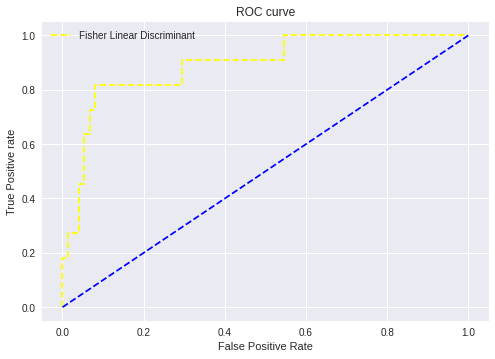

In [ ]:
accuracy_fl_test = []
accuracy_fl_train = []

for i in range(7):
  if i == 6:
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:15])
                train_data_y.append(data_g[j][w][15])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:15])
                test_data_y.append(data_g[j][w][15])
                
    #convert into array
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn
    clf = LinearDiscriminantAnalysis()
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    test_pred_y_log = clf.predict(test_data_xn)
    train_pred_y_log = clf.predict(train_data_xn)
    
    pred_prob1 = clf.predict_proba(test_data_xn)

    from sklearn.metrics import roc_curve

    # roc curve for models
    fpr3, tpr3, thresh3 = roc_curve(test_data_yn, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(test_data_yn))]
    p_fpr, p_tpr, _ = roc_curve(test_data_yn, random_probs, pos_label=1)
    
    from sklearn.metrics import roc_auc_score
    auc_score1 = roc_auc_score(test_data_yn, pred_prob1[:,1])
    print(auc_score1)

    # matplotlib
    import matplotlib.pyplot as plt
    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='Fisher Linear Discriminant')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    #predict class
    test_pred_y_fl = clf.predict(test_data_xn)
    train_pred_y_fl = clf.predict(train_data_xn)
    
    #calculating and appending accuracies
    acc1_fl = accuracy_score(test_data_yn, test_pred_y_fl)
    accuracy_fl_test.append(acc1_fl)
    
    acc2_fl = accuracy_score(train_data_yn, train_pred_y_fl)
    accuracy_fl_train.append(acc2_fl)
    print("----------------------TESTING-----------------------")
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(test_data_yn, test_pred_y_log, target_names=target_names))

In [ ]:
#printing accuracies 

print("Mean accuracy for test set = ", statistics.mean(accuracy_fl_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_fl_train))

Mean accuracy for test set =  0.8953488372093024
Mean accuracy for train set =  0.8604651162790697


# **KNN**

In [ ]:
df

,Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume_,Red_blood_Cells,Lymphocytes,Mean_corpuscular_hemoglobin_concentration (MCHC),Leukocytes,Basophils,Mean_corpuscular_hemoglobin_(MCH),Eosinophils,Mean_corpuscular_volume_(MCV),Monocytes,Red_blood_cell_distribution_width_(RDW),Neutrophils,SARS-Cov-2_exam_result
70,0.694287,0.416252,0.060430,0.796029,0.225417,1.401554,-0.851210,-0.656734,0.998070,0.282719,0.892207,0.747050,0.147441,-0.094334,-1.528714,0
474,-1.617460,-1.463427,0.550341,-0.438097,-1.625771,-0.568655,0.244149,-0.773612,-0.529226,0.491805,0.934346,0.426576,-0.220244,-0.359703,0.528192,1
168,-0.518807,-0.272964,-0.215930,0.459449,-0.515058,-0.457777,0.941197,-0.573250,-0.223767,0.439533,-0.709090,0.066045,2.537393,-0.801985,-0.127395,1
567,1.152058,1.230779,1.002566,-0.550290,1.371390,0.036907,0.542882,0.679006,0.081693,-0.344541,2.072109,-0.675050,0.278757,0.082579,-0.446994,0
31,0.694287,0.729532,-0.341548,-1.111256,0.401720,0.693644,0.343725,-0.428545,-1.140144,0.491805,0.007280,0.386517,-1.796036,0.171035,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,0.785841,0.416252,-1.158065,2.927700,-0.127191,-1.617727,-1.149948,0.673440,0.081693,0.962249,-0.751229,1.688438,-1.113193,2.470904,2.052433,0
150,0.488289,0.353596,-0.391795,1.132609,0.683806,0.497476,-0.353319,-0.411849,-0.223767,-0.658171,-0.624811,-0.534842,-0.640455,-1.155812,-0.070032,0
107,-0.862136,-0.774212,-2.276066,0.347255,-1.061599,0.096611,0.144572,-1.828290,1.914447,0.648619,-0.835508,0.646902,1.092916,1.232513,NaN,0
455,0.762952,0.541564,-1.748470,-0.213711,0.278308,0.864224,-0.652057,-0.261578,-1.140144,0.387261,0.007280,0.747050,-1.008140,0.259492,NaN,1


In [ ]:
y=df[['SARS-Cov-2_exam_result']] 
y

,SARS-Cov-2_exam_result
70,0
474,1
168,1
567,0
31,0
...,...
270,0
150,0
107,0
455,1


In [ ]:
x=df.drop(['SARS-Cov-2_exam_result'], axis = 1)
x

,Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume_,Red_blood_Cells,Lymphocytes,Mean_corpuscular_hemoglobin_concentration (MCHC),Leukocytes,Basophils,Mean_corpuscular_hemoglobin_(MCH),Eosinophils,Mean_corpuscular_volume_(MCV),Monocytes,Red_blood_cell_distribution_width_(RDW),Neutrophils
70,0.694287,0.416252,0.060430,0.796029,0.225417,1.401554,-0.851210,-0.656734,0.998070,0.282719,0.892207,0.747050,0.147441,-0.094334,-1.528714
474,-1.617460,-1.463427,0.550341,-0.438097,-1.625771,-0.568655,0.244149,-0.773612,-0.529226,0.491805,0.934346,0.426576,-0.220244,-0.359703,0.528192
168,-0.518807,-0.272964,-0.215930,0.459449,-0.515058,-0.457777,0.941197,-0.573250,-0.223767,0.439533,-0.709090,0.066045,2.537393,-0.801985,-0.127395
567,1.152058,1.230779,1.002566,-0.550290,1.371390,0.036907,0.542882,0.679006,0.081693,-0.344541,2.072109,-0.675050,0.278757,0.082579,-0.446994
31,0.694287,0.729532,-0.341548,-1.111256,0.401720,0.693644,0.343725,-0.428545,-1.140144,0.491805,0.007280,0.386517,-1.796036,0.171035,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,0.785841,0.416252,-1.158065,2.927700,-0.127191,-1.617727,-1.149948,0.673440,0.081693,0.962249,-0.751229,1.688438,-1.113193,2.470904,2.052433
150,0.488289,0.353596,-0.391795,1.132609,0.683806,0.497476,-0.353319,-0.411849,-0.223767,-0.658171,-0.624811,-0.534842,-0.640455,-1.155812,-0.070032
107,-0.862136,-0.774212,-2.276066,0.347255,-1.061599,0.096611,0.144572,-1.828290,1.914447,0.648619,-0.835508,0.646902,1.092916,1.232513,NaN
455,0.762952,0.541564,-1.748470,-0.213711,0.278308,0.864224,-0.652057,-0.261578,-1.140144,0.387261,0.007280,0.747050,-1.008140,0.259492,NaN


In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(x)
#X_2 = X
SimpleImputer()
X = imp.transform(x)
X

array([[ 0.69428688,  0.41625211,  0.06043023, ...,  0.14744094,
        -0.09433432, -1.52871394],
       [-1.61745954, -1.46342742,  0.55034077, ..., -0.22024387,
        -0.35970309,  0.52819222],
       [-0.51880735, -0.27296397, -0.21592958, ...,  2.53739309,
        -0.80198544, -0.12739536],
       ...,
       [-0.86213595, -0.774212  , -2.2760663 , ...,  1.09291649,
         1.23251295, -0.05364196],
       [ 0.76295245,  0.54156393, -1.74847019, ..., -1.00814009,
         0.2594921 , -0.05364196],
       [-0.3356989 , -0.46093205,  1.12818408, ...,  0.38380998,
         0.43640488, -0.57811183]])

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.1, random_state=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.8120748299319727


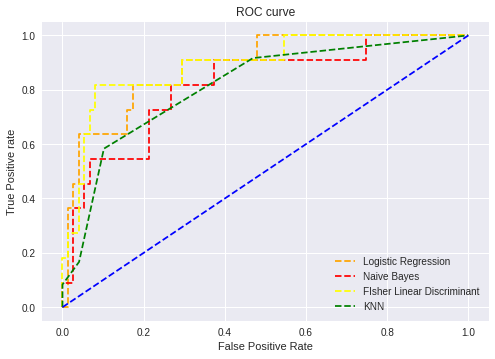

In [ ]:
#Fitting K-NN classifier to the training set
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)
#importing model from sklearn 
    
    #predict class
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
    
pred_prob1 = classifier.predict_proba(x_test)

from sklearn.metrics import roc_curve

    # roc curve for models
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)

    # matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

    # plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='FIsher Linear Discriminant')
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
plt.title('ROC curve')
    # x label
plt.xlabel('False Positive Rate')
    # y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test) 
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
#Creating the Confusion matrix
cm= confusion_matrix(y_test, y_pred)

In [ ]:
#finding accuracy
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("The Confusion Matrix is:\n ",cm)
target_names = ['Covid Negative', 'Covid Positive']
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 80.33%
The Confusion Matrix is:
  [[47  2]
 [10  2]]
                precision    recall  f1-score   support

Covid Negative       0.82      0.96      0.89        49
Covid Positive       0.50      0.17      0.25        12

      accuracy                           0.80        61
     macro avg       0.66      0.56      0.57        61
  weighted avg       0.76      0.80      0.76        61

